In [1]:
using LinearAlgebra
using Plots

In [2]:
function GaussJordan(M)
    linhaSemPivo = 1
    jaTemPivo = 0
    for j in 1:1:size(M, 2)
        for i in linhaSemPivo:1:size(M, 1)
            if(M[i, j] != 0 && jaTemPivo == 0)
                M[i, :] /= M[i, j]
                linhaSemPivo = i+1
                jaTemPivo = 1
                if(linhaSemPivo > 1)
                    for k in 1:1:linhaSemPivo-2
                        M[k, :] -= M[k, j]*M[linhaSemPivo-1, :]
                    end
                end
            elseif(M[i, j] != 0)
                M[i, :] -= M[i, j]*M[linhaSemPivo-1, :]
            end
        end
        if(linhaSemPivo > size(M, 1))
            break
        end
        jaTemPivo = 0
    end
    return M
end

GaussJordan (generic function with 1 method)

In [3]:
function AchaFuncaoDeGrau1(M::Matrix{Float64})
    #solucao = A em A'Ax = Ab
    #parte esquerda de A'Ax = A'b
    A = M[1, :]
    A = hcat(A, ones(size(A, 1)))
    S = A'A
    #parte direita de A'Ax = A'b
    S = hcat(S, A'M[2, :])
    S = GaussJordan(S)
    return S[:, 3]
end

AchaFuncaoDeGrau1 (generic function with 1 method)

In [4]:
function AchaFuncaoDeGrau2(M::Matrix{Float64})
    #solucao = A em A'Ax = Ab
    #parte esquerda de A'Ax = A'b
    #sem P dá erro por ter trocado o modo como trato os pontos
    P = EncontraVetoresDoSistema(M, 2)
    A = hcat(P, M[1, :])
    A = hcat(A, ones(size(A, 1)))
    S = A'A
    #parte direita de A'Ax = A'b
    S = hcat(S, A'M[2, :])
    S = GaussJordan(S)

    return S[:, 4]
end

AchaFuncaoDeGrau2 (generic function with 1 method)

In [5]:
#Dada uma matriz, é aplicado minimos quadrados a ela em busca de uma funcao de grau N que melhor se aproxime dos vetores da matriz
function AchaFuncaoDeGrauN(M::Matrix{Float64}, g)
    #Coleta os vetores do sistema

    P = EncontraVetoresDoSistema(M, g)
    #solucao = A em A'Ax = Ab
    #parte esquerda de A'Ax = A'b
    #formação de A
    #=A = M[1, :]
    for i in 2:1:size(M, 1)-1
        A = hcat(A, M[i, :])
    end=#
    if(g > 1)
        A = hcat(P, M[1, :])
    else
        A = M[1, :]
    end
    A = hcat(A, ones(size(A, 1)))
    #A'A
    S = A'A
    #parte direita de A'Ax = A'b
    S = hcat(S, A'M[size(M, 1), :])
    S = GaussJordan(S)

    return S[:, size(S, 2)]

end

AchaFuncaoDeGrauN (generic function with 1 method)

In [6]:
function EncontraVetoresDoSistema(M, g)
    #=p21 = [1.; 1.; 9.]
    p22 = [25.; 5.; 49.]
    p23 = [9.; 3.; 25.]=#
    x = M[1, :]
    P = M[1, :].^g
    g-=1
    while(g >= 2)
        P = hcat(P, M[1, :].^g)
        g-=1
    end
    return P
end

EncontraVetoresDoSistema (generic function with 1 method)

In [7]:
function ResolveFuncao(c, x)
    y = 0
    for (i, k) in enumerate(c)
       y += k*x^(size(c, 1)-i)
    end
    return y
end

ResolveFuncao (generic function with 1 method)

In [8]:
function AchaNorma(vetor)
    norma = 0
    for v in vetor
        norma += v^2
    end
    return sqrt(norma)
end

AchaNorma (generic function with 1 method)

In [9]:
function CalculaErro(M, c)
    dist = 0
    for i in size(M, 2)
        display([M[1, i]; ResolveFuncao(c, i)])
        dist = AchaNorma(M[:, i] - [M[1, i]; ResolveFuncao(c, i)])
    end
    return dist/size(M, 2)
end

CalculaErro (generic function with 1 method)

In [12]:
#=M = [2. 4. 3. 32. 0. 0. 1. 0. -1.; 1. 2. -2. -19. -1. 0. 0. 1. 0.; 2. 4. 0. 2. -1. 1. 0. 0. -1.]
GaussJordan(M)=#
p1 = [1.; 15.]
p2 = [4.; 30.]
p3 = [3.; 20.]
p4 = [5.;56.]
M = p1
M = hcat(M, p2)
M = hcat(M, p3)
M = hcat(M, p4)
f2 = AchaFuncaoDeGrau1(M)
#=
p5 = [1.; 9.]
p6 = [5.; 49.]
p7 = [3.; 25.]
N = p5
N = hcat(N, p6)
N = hcat(N, p7)
fn = AchaFuncaoDeGrauN(N, 2)=#

fn = AchaFuncaoDeGrauN(M, 5)


for i in 1:1:size(fn, 1)
    grau = size(fn, 1)-i
    if(i != 1  && fn[i] != 0)
        print(fn[i] >= 0 ? " + " : " - ")
    end
    if(grau != 0 && fn[i] != 0)
        print(abs(fn[i]),"x^", size(fn, 1)-i)
    elseif(fn[i] != 0)
        print(abs(fn[i]))
    end
end
M
#ResolveFuncao(f3, 3)
#N
#EncontraVetoresDoSistema(M, 2)

0.018304428252172218x^5 - 0.03683385498970615x^4 - 0.15964699287282627x^3 + 1.4077252020414992x^2 - 1.7969715197438951x^1 + 15.567422737312759

2×4 Matrix{Float64}:
  1.0   4.0   3.0   5.0
 15.0  30.0  20.0  56.0

In [13]:
min = -10
max = 10
B = rand(2, 10) .* (max - min) .+ min

2×10 Matrix{Float64}:
 9.95909  1.81813  -0.803249  -9.34138  …  -3.40635    5.15484  -6.68631
 3.31598  4.68394  -7.12916    9.06694     -0.558044  -4.60792  -4.38872

2-element Vector{Float64}:
  5.0
 -4.706380538433624

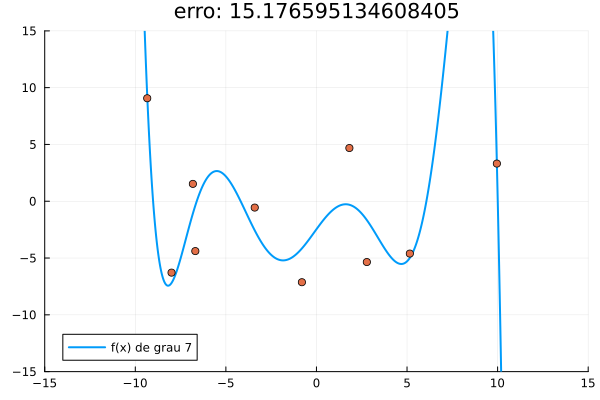

In [15]:
#teste geral
gr(linewidth=2)

lx = 15
ly = 15
plot(0, 0)
p = []
for i in 1:1:size(B, 2)
    push!(p, Tuple(B[:, i]))
end
pontos = [a for a in p]
valoresDeFuncao = []
g = 7
fn = AchaFuncaoDeGrauN(B, g)
for i in -lx:0.01:lx
    push!(valoresDeFuncao, (i, ResolveFuncao(fn, i)))
end
erro=CalculaErro(M, fn)
val = [t for t in valoresDeFuncao]
plot(val, xlim = (-lx, lx), ylim = (-ly, ly), label="f(x) de grau $(g)")
scatter!(pontos, label="", title="erro: $(erro)")

dist

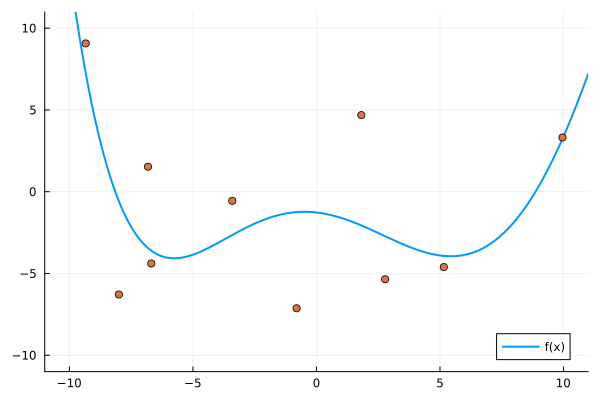

In [16]:
#teste com grau 1, 2, 3, 5
gr(linewidth=2)
lx = 11
ly = 11
plot(0, 0)
p = []
for i in 1:1:size(B, 2)
    push!(p, Tuple(B[:, i]))
end
pontos = [a for a in p]
valores = []
f = (AchaFuncaoDeGrauN(B, 1), AchaFuncaoDeGrauN(B, 2), AchaFuncaoDeGrauN(B, 3),
    AchaFuncaoDeGrauN(B, 5))
plots = []
for j  in 1:1:4
    for i in -lx:0.01:lx
        push!(valores, (i, ResolveFuncao(f[j], i)))
    end
    val = [t for t in valores]
    push!(plots, plot(val, xlim = (-lx, lx), ylim = (-ly, ly), label="f(x)"))
    valores = []
end

scatter!(pontos, label="")

In [17]:
c = [1;1;4353;1]
for (i, k) in enumerate(c)
       println(i)
       println(k)
       println("\n")
    end
c

1
1


2
1


3
4353


4
1




4-element Vector{Int64}:
    1
    1
 4353
    1

In [18]:
typeof(1:1:10)

StepRange{Int64, Int64}

In [19]:
fn

8-element Vector{Float64}:
 -5.6668268362591264e-5
 -2.8021132265581688e-5
  0.008046675452360388
  0.006563085390113837
 -0.2835685317993755
 -0.10998838105189829
  2.1977548030897203
 -2.465917675275763

In [20]:
AchaNorma([1 0 1])

1.4142135623730951